# MONTE CARLO SIMULATION

In [2]:
from random import random

rand1 = random()
rand2 = random()

#Formula idea (in excel)
#=IF1(A1- 0.52n 2 + 1B1- 0.52n 2 6 0.5n 2,4,02


In [3]:
# Estimating pi/4
# cos^2 + sin^2 = radius^2 = 1/4

result= (rand1 - 0.5)**2 + (rand2 - 0.5)**2

print(result)

0.007507113808030644


In [4]:
# Iterating process
n_iterations=1000000

def estimate_pi(n_iterations):
    count=0
    for i in range(n_iterations):
        rand1 = random()
        rand2 = random()
        result= (rand1 - 0.5)**2 + (rand2 - 0.5)**2
        if result < 0.25:
            count+=4
    return count/n_iterations

print(estimate_pi(n_iterations))

3.14142


In [5]:
#plotting the figure of progressively better estimates of pi with a circle and square
import matplotlib.pyplot as plt
import numpy as np



pi estimation: 3.0924


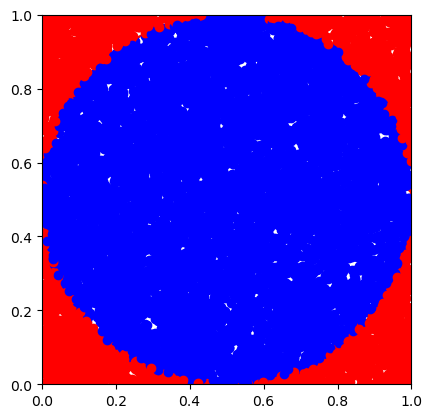

In [6]:
n_iterations=10000
def plot_pi(n_iterations):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.add_patch(plt.Circle((0.5, 0.5), 0.5, fill=False))
    x = np.linspace(0,1,100)
    y = np.sqrt(0.25 - (x - 0.5)**2) + 0.5
    ax.plot(x, y, 'r')
    ax.plot(x, 1-y, 'r')
    count=0
    for i in range(n_iterations):
        rand1 = random()
        rand2 = random()
        result= (rand1 - 0.5)**2 + (rand2 - 0.5)**2
        if result < 0.25:
            ax.plot(rand1, rand2, 'bo')
            count += 4
        else:
            ax.plot(rand1, rand2, 'ro')
    print('pi estimation:', count/n_iterations)
    plt.show()

plot_pi(n_iterations)

$\sqrt{a}$

## One year stock modelling with BS SDE

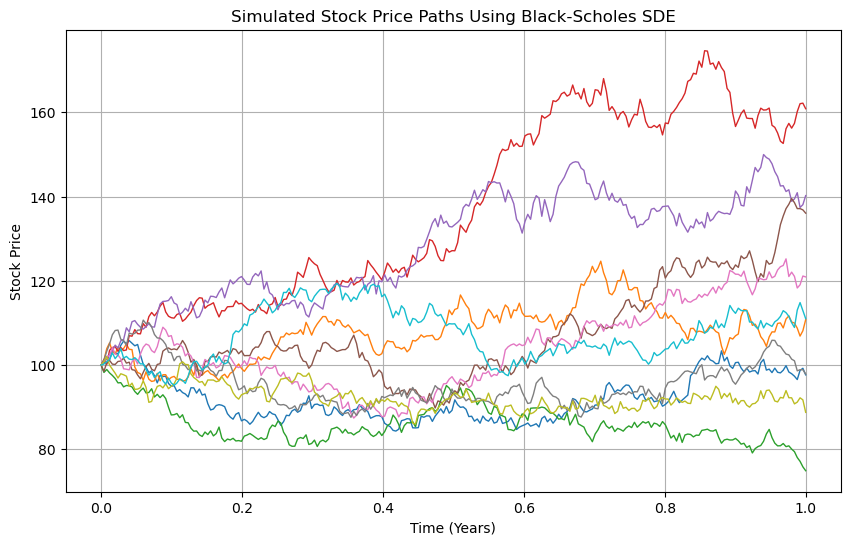

In [27]:
# Parameters for the Black-Scholes SDE simulation
S0 = 100  
mu = 0.05  
r = 0.02  
sigma = 0.2  
T = 1  
dt = 1/252  
N = int(T/dt)  
M = 10  

# Simulate M stock price paths using the Black-Scholes SDE
np.random.seed(42)
t = np.linspace(0, T, N)
S_paths = np.zeros((M, N))
S_paths[:, 0] = S0

for i in range(M):
    for j in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
        S_paths[i, j] = S_paths[i, j-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)

# Plot the simulated stock price paths
plt.figure(figsize=(10, 6))
for i in range(M):
    plt.plot(t, S_paths[i], lw=1)

plt.title("Simulated Stock Price Paths Using Black-Scholes SDE")
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.grid(True)
plt.show()

# Simulating 1 000 000 sde

In [58]:
M = 1000
# Simulate M stock price paths using the Black-Scholes SDE
np.random.seed(42)
t = np.linspace(0, T, N)
S_paths = np.zeros((M, N))
S_paths[:, 0] = S0

for i in range(M):
    for j in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
        S_paths[i, j] = S_paths[i, j-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)




## Calculate the option payoffs at maturity

In [53]:
K=100
payoff = np.maximum(S_paths[:, -1] - K, 0)
option_price = np.exp(-r * T) * np.mean(payoff)
print("Option price:", option_price)

Option price: 8.711634732792229


In [56]:
#pip install nbimporter

## Comparing to BS

In [ ]:
import nbimporter
from Moving_variables_for_BS_and_greeks import black_scholes_call

# Calculate the Black-Scholes call price
bs_call_price = black_scholes_call(S, K, T, r, sigma)

# Print the results
print("Monte Carlo estimated call price:", option_price)
print("Black-Scholes call price:", bs_call_price)

Monte Carlo estimated call price: 8.711634732792229
Black-Scholes call price: 8.916037278572539


We use numpy here for its vectorised computation of arrays (otherwise it would take dozens of minutes for millions of simulations)

In [64]:
#Faster monte carlo simulation
# Vectorized Monte Carlo simulation
N = 1000000  # Number of simulations
W = np.random.normal(0, np.sqrt(T), size=N)  # Generate all Brownian motions at once
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * W)  # Compute all future prices in one step
prices = np.maximum(ST - K, 0)  # Compute payoffs

call_price = np.exp(-r * T) * np.mean(prices)  # Discounted expectation
print(call_price)

8.929869015641472


Brownian motion

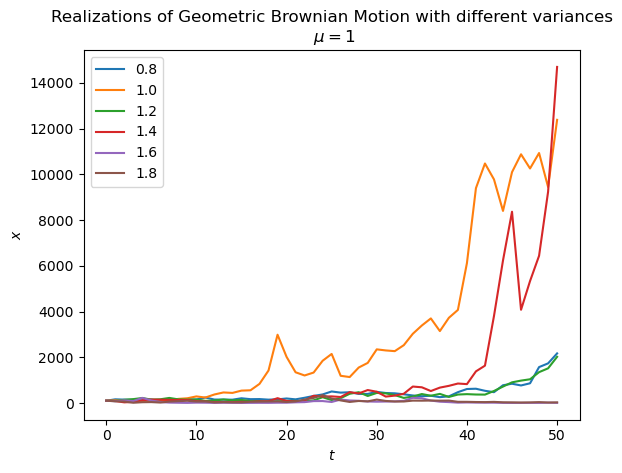

In [4]:
# Python code for the plot

import numpy as np
import matplotlib.pyplot as plt

mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()